In [1]:
# take a look of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read zipfile
df = pd.read_csv('data/filled_missing_data.zip')

In [3]:
df

,timestamp,nodeid,temperature,humidity,voltage,light
0,30.0,1.0,NaN,NaN,NaN,NaN
1,30.0,2.0,NaN,NaN,NaN,NaN
2,30.0,3.0,20.204,36.8871,2.69964,50.6
3,30.0,4.0,NaN,NaN,NaN,NaN
4,30.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5826145,3233040.0,50.0,NaN,NaN,NaN,NaN
5826146,3233040.0,51.0,NaN,NaN,NaN,NaN
5826147,3233040.0,52.0,NaN,NaN,NaN,NaN
5826148,3233040.0,53.0,NaN,NaN,NaN,NaN


In [4]:
# how many days data?
3233040/3600/24

37.419444444444444

In [ ]:
# how many unique timestamp?
df['timestamp'].nunique()

107768

In [6]:
107768*30
# at least no missing timestamp

3233040

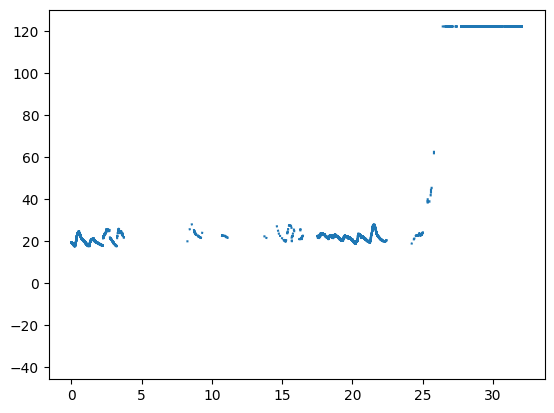

In [12]:
# select one node and plot the temperature
node = 3
df_node = df[df['nodeid']==node]
plt.plot(df_node['timestamp']/3600/24, df_node['temperature'])

In [21]:
# select the first day data
START_DAY=17
END_DAY=23+1
start_time = START_DAY*24*3600
end_time = END_DAY*24*3600  
df_day = df[(df['timestamp']>=start_time) & (df['timestamp']<end_time)]
print(df_day.shape)

(1088640, 6)


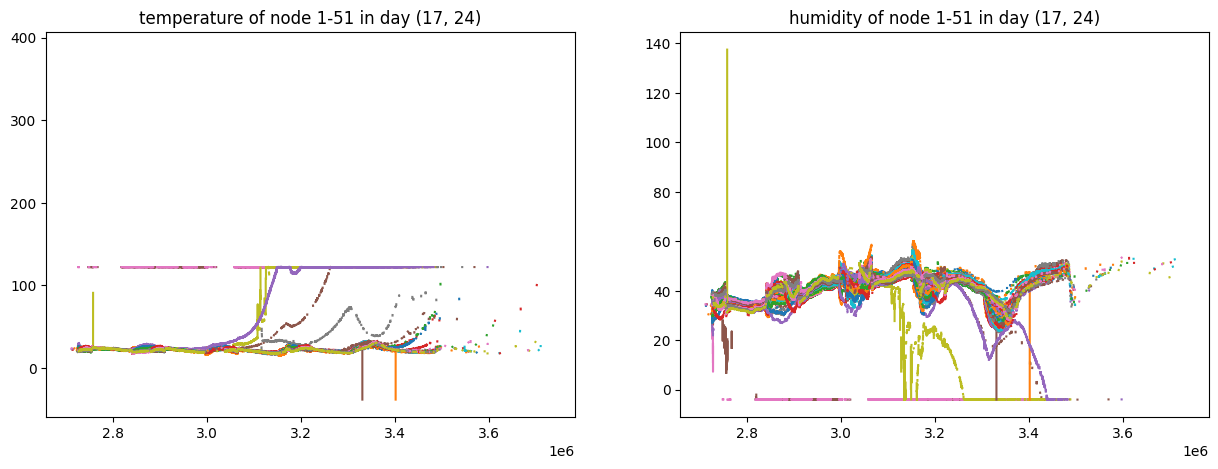

In [31]:
# 4 subplots (2,2)
fig, ax = plt.subplots(1,2, figsize=(15,5))
bad_sensor_list=[5,8,15,18,20,50, 16,17, 35,46,19,6,22,39,32,26] # low voltage
bad_sensor_list=[-1] # low voltage
# plot temperature
for node in range(1, 51):
    if node not in bad_sensor_list:
        df_node = df_day[df_day['nodeid']==node]
        df_node['temperature'].plot(ax=ax[0])
        df_node['humidity'].plot(ax=ax[1])
        # df_node['light'].plot(ax=ax[1,0])
        # df_node['voltage'].plot(ax=ax[1,1])
        ax[0].set_title(f'temperature of node 1-51 in day {START_DAY, END_DAY}')
        ax[1].set_title(f'humidity of node 1-51 in day {START_DAY, END_DAY}')
        # ax[1,0].set_title(f'light of node 1-51 in day {START_DAY, END_DAY}')
        # ax[1,1].set_title(f'voltage of node 1-51 in day {START_DAY, END_DAY}')

    
    
plt.show()

In [55]:
# which node has the highest temperature?
df_day.groupby('nodeid')['voltage'].min().sort_values(ascending=True)

nodeid
39.0    0.009101
17.0    2.062220
32.0    2.098660
16.0    2.144120
26.0    2.175530
22.0    2.224420
35.0    2.241210
46.0    2.241210
19.0    2.241210
6.0     2.258250
13.0    2.266870
11.0    2.275560
38.0    2.284310
21.0    2.329100
4.0     2.329100
54.0    2.347510
12.0    2.347510
52.0    2.347510
25.0    2.356830
49.0    2.356830
27.0    2.356830
2.0     2.356830
37.0    2.356830
23.0    2.366220
42.0    2.366220
53.0    2.366220
30.0    2.366220
41.0    2.366220
51.0    2.366220
43.0    2.375680
40.0    2.375680
44.0    2.375680
1.0     2.375680
34.0    2.375680
31.0    2.375680
24.0    2.375680
10.0    2.375680
36.0    2.375680
29.0    2.375680
45.0    2.385220
47.0    2.385220
33.0    2.394840
14.0    2.394840
7.0     2.394840
3.0     2.394840
48.0    2.404530
9.0     2.454210
28.0    2.464400
5.0          NaN
8.0          NaN
15.0         NaN
18.0         NaN
20.0         NaN
50.0         NaN
Name: voltage, dtype: float64

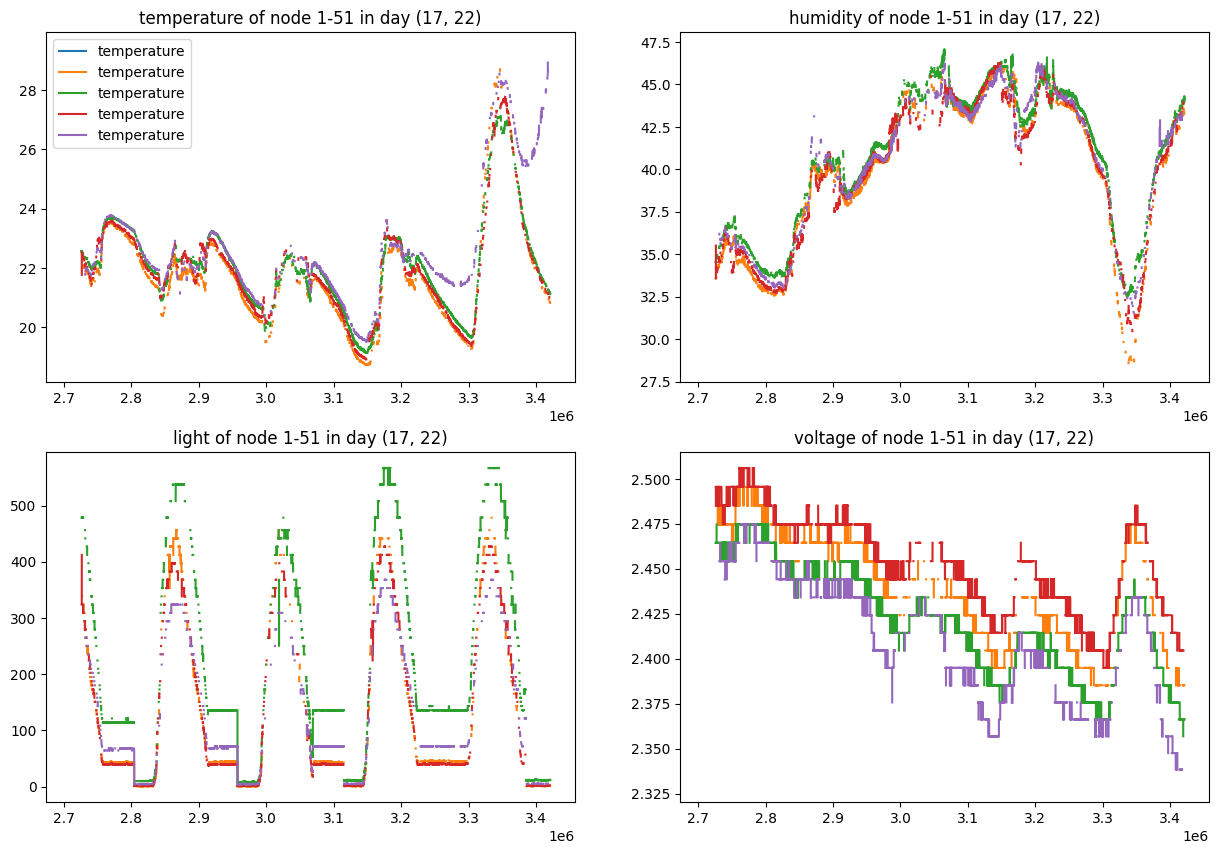

In [83]:
# 4 subplots (2,2)
fig, ax = plt.subplots(2,2, figsize=(15,10))
# plot temperature
for node in range(5):
    df_node = df_day[df_day['nodeid']==node]
    df_node['temperature'].plot(ax=ax[0,0],legend=f'{node}')
    df_node['humidity'].plot(ax=ax[0,1])
    df_node['light'].plot(ax=ax[1,0])
    df_node['voltage'].plot(ax=ax[1,1])
    ax[0,0].set_title(f'temperature of node 1-51 in day {START_DAY, END_DAY}')
    ax[0,1].set_title(f'humidity of node 1-51 in day {START_DAY, END_DAY}')
    ax[1,0].set_title(f'light of node 1-51 in day {START_DAY, END_DAY}')
    ax[1,1].set_title(f'voltage of node 1-51 in day {START_DAY, END_DAY}')
    
plt.show()

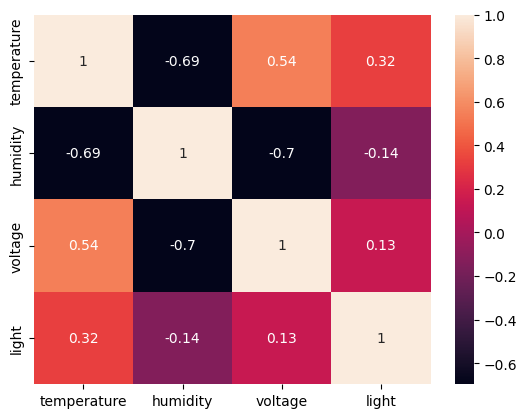

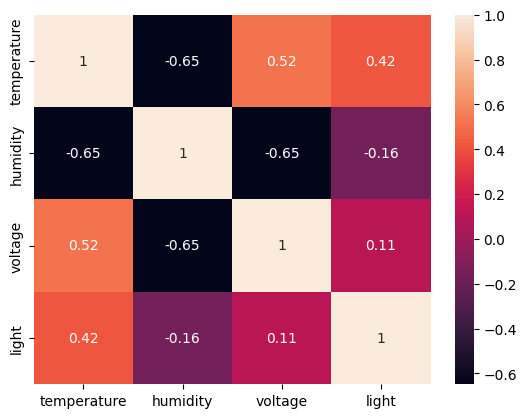

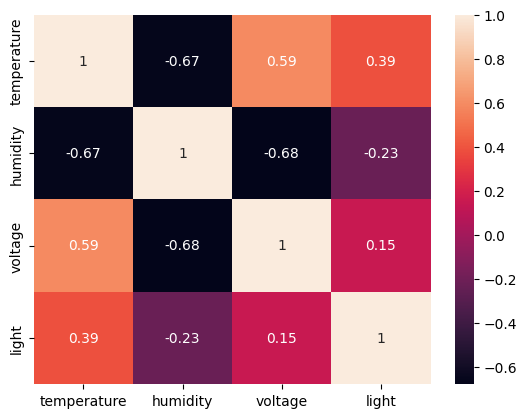

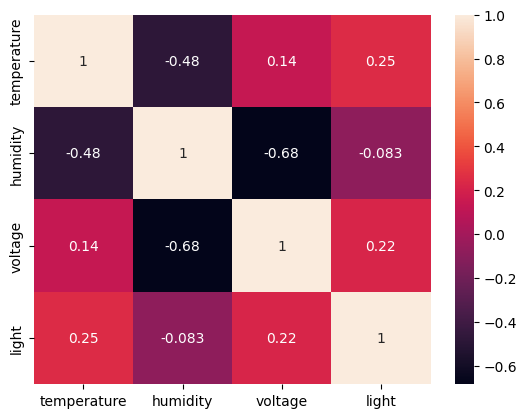

In [78]:
for node in range(1,5):
    df_node=df_day[df_day['nodeid']==node].dropna()
    # plot the correlation
    sns.heatmap(df_node[['temperature','humidity','voltage','light']].corr(method='pearson'), annot=True)
    plt.show()